In [7]:
from rectangle_packing import *
from polygon_packing import *
from plotting import *

import random

This notebook provides a short demonstration on how to use the functions in this repository.

# Produce a Random Instance of Polygons

In [8]:
# Set the amount of polygons we want to generate
n = 300

# Set the parameter 'c', that influences the width of the strip.
c = 15

# Randomly generate a set of polygons with 3 to 6 vertices each.
random_polygons = [[(random.random()/5,random.random()/5) for j in range(random.randint(3,7))] for i in range(n)]

# Translate all polygons so that they touch both the x=0 and y=0 axis. Our algorithm needs this standardization.
random_polygons = [left_bottom_adjust_polygon(polygon) for polygon in random_polygons]

In [9]:
# Each polygon is given as a list of its vertices. Each vertex is given as a tuple of non-negative real numbers
random_polygons[0]

[(0.012491210677516351, 0.03370259858816253),
 (0.0, 0.08884665684407536),
 (0.11742350836110663, 0.0)]

# Compute a Packing of the Polygons using our Algorithm

In [13]:
# The function 'polygon_packing' provides our main algorithm. The parameter 'rectangle_strip_packing_algorithm' can be set to either 'nfdh' or 'ffdh', depending on which rectangle shelf-packing algorithm should be used as a subroutine.
packed_random_polygons, packed_random_polygons_bounding_parallelograms, width, height = polygon_packing(random_polygons,c=c,rectangle_strip_packing_algorithm="ffdh")

Outputs of the function are the polygons with their location in the packing, the bounding parallelograms of the polygons, as well as the total width and height of the packing.

In [18]:
# Each polygon is again given as list of its vertices, however now translated to where it lies in the packing produced by the algorithm.
packed_random_polygons[int(n/2)]

[(1.8297306016800161, 1.3291829819358254),
 (1.9307769155257, 1.3257947354550517),
 (1.8835959001907447, 1.2686848664684935),
 (1.8978687357103672, 1.3723758535486779),
 (1.953478282469595, 1.3170642917919346)]

# Visualize the Packing

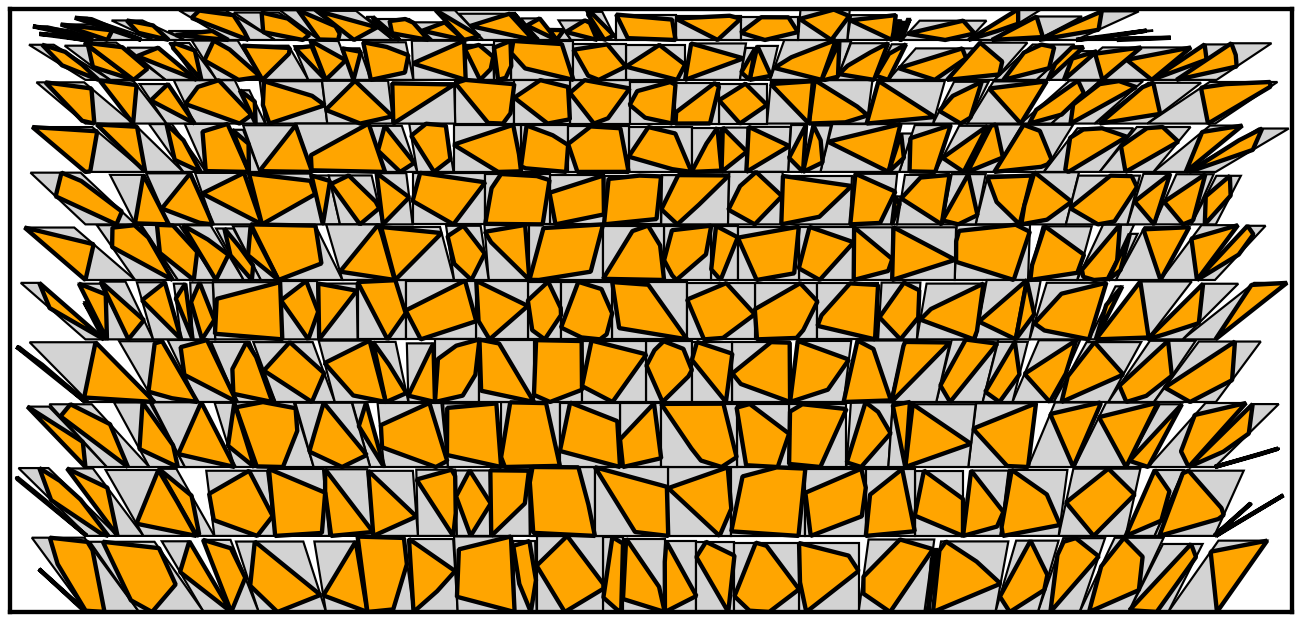

In [14]:
# The function 'visualize_polygons' can now be called to plot the packing. One may choose to leave away the parameter 'bounding_parallelograms' if the bounding-parallelograms should not be plotted.
visualize_polygons(packed_random_polygons, bounding_parallelograms = packed_random_polygons_bounding_parallelograms, figure_size = (200,200), binsize = (width,height))